In [33]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [34]:
#读取数据并将其存入dataframe的数据结构中并命名为"df"
df = pd.read_csv('movie.csv', encoding = 'unicode_escape', index_col=None)

##  数据清洗

In [35]:
#检查是否存在缺失值
df.isnull().any()

id                   False
original_language    False
original_title       False
popularity           False
release_date          True
vote_average         False
vote_count           False
genre                False
dtype: bool

In [36]:
df.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre
0,580489,en,Venom: Let There Be Carnage,8222.616,2021/9/30,7.0,828,"['Science Fiction', 'Action']"
1,335983,en,Venom,3012.242,2018/9/28,6.8,11846,"['Science Fiction', 'Action']"
2,550988,en,Free Guy,3864.616,2021/8/11,7.8,2908,"['Comedy', 'Action', 'Adventure', 'Science Fic..."
3,772436,es,"Matando Cabos 2, La M¨¢scara del M¨¢scara",2556.789,2021/10/1,7.7,34,"['Action', 'Comedy', 'Adventure']"
4,568620,en,Snake Eyes: G.I. Joe Origins,2164.071,2021/7/22,6.9,685,"['Action', 'Adventure']"


In [37]:
#查看缺失值
df.isna().sum()

id                    0
original_language     0
original_title        0
popularity            0
release_date         40
vote_average          0
vote_count            0
genre                 0
dtype: int64

In [38]:
#删除缺失值
df = df.dropna(axis='rows')

In [39]:
#保存处理后的DataFrame为新的csv文件
df.to_csv('processed_data',index=False)

#  探索数据

In [40]:
df = pd.read_csv('processed_data')

In [41]:
print(df.dtypes)

id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
genre                 object
dtype: object


In [42]:
#将release_date这一列的数据改为日期型
df['release_date'] = pd.to_datetime(df['release_date'])

In [43]:
print(df.dtypes)

id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
vote_average                float64
vote_count                    int64
genre                        object
dtype: object


In [44]:
#最受欢迎的10000部电影中数据集中，各个年份的电影数
year_counts = df['release_date'].dt.year.value_counts()

print(year_counts)

release_date
2021    831
2019    603
2018    577
2017    574
2020    571
       ... 
1926      1
1920      1
1902      1
2028      1
1915      1
Name: count, Length: 105, dtype: int64


In [45]:
#统计数据集中出现的电影发布年份
year_categories = df['release_date'].dt.year.unique()

print(year_categories)

[2021 2018 2020 2017 2009 2012 2019 2007 2022 2008 2013 2010 2015 2014
 2001 2005 2023 2002 1978 2004 2011 1986 1993 1981 1984 2016 1988 1989
 1998 1994 1995 1997 1999 1996 2000 2003 1991 2006 1950 1973 1990 1992
 1938 1940 1972 1982 1974 1941 1942 1961 1967 1971 1951 1980 1977 1939
 1953 1985 1959 1983 1970 1987 1975 1955 1963 1956 1976 1966 1979 1968
 1969 1964 1960 1962 2028 1946 2024 1965 1949 1957 2026 1933 1932 1954
 1931 1922 1945 1958 1947 1952 1927 1948 1902 1920 1926 1936 1943 1944
 1925 1935 1934 1930 1928 1929 1915]


In [46]:
df['year'] = pd.to_datetime(df['release_date']).dt.year

#统计出各个发布年份下最受欢迎的电影的popularity（受欢迎程度）
max_popularity_by_year = df.groupby('year')['popularity'].max()

#由上面的年份统计可知，该数据集中有部分电影还未发布，我们只关注已经发布的电影，将还未到的3个年份删除
max_popularity_by_year = max_popularity_by_year.drop(max_popularity_by_year.tail(3).index)

print(max_popularity_by_year)

year
1902      11.440
1915       8.544
1920      11.928
1922      11.077
1925      12.296
          ...   
2019     311.132
2020    1786.875
2021    8222.616
2022     273.981
2023     194.837
Name: popularity, Length: 102, dtype: float64


In [47]:
#统计出各个发布年份下最受欢迎的电影的投票人数
max_vote_count_by_year = df.groupby('year')['vote_count'].max()

#除了未到的3个年份，2022和2023年上映的电影的投票人数尚未被统计，故删除最后五行
max_vote_count_by_year = max_vote_count_by_year.drop(max_vote_count_by_year.tail(5).index)

print(max_vote_count_by_year)

year
1902     1211
1915      364
1920     1005
1922     1321
1925     1094
        ...  
2017    17253
2018    22877
2019    19295
2020     8159
2021     7092
Name: vote_count, Length: 100, dtype: int64


In [16]:
#先将gener中的“[]”删除，防止统计时出现错误
df['genre'] = df['genre'].apply(lambda x: str(x).strip('[]'))

#将genre列的元素按逗号进行分割
df['genre'] = df['genre'].str.split(',')
#将列表展开成多行，每一行包含一个单独的电影类型
df = df.explode('genre')

#找到每个电影类型下popularity的最大值
max_popularity_by_genre = df.groupby('genre')['popularity'].max().reset_index()
max_popularity_by_genre = max_popularity_by_genre.drop([0,3,4,5,20,21,25,26,27,28,29,11,31,32,14,15,35,36,37,19])

print(max_popularity_by_genre)

                genre  popularity
1            'Action'    8222.616
2         'Adventure'    3864.616
6       'Documentary'     134.988
7             'Drama'    1878.150
8            'Family'    2191.005
9           'Fantasy'    1523.567
10          'History'     337.863
12            'Music'     519.264
13          'Mystery'    1078.555
16         'TV Movie'     652.862
17         'Thriller'    2636.999
18              'War'     231.406
22        'Animation'    2191.005
23           'Comedy'    3864.616
24            'Crime'    1878.150
30           'Horror'    2636.999
33          'Romance'     891.224
34  'Science Fiction'    8222.616
38          'Western'     749.644


In [48]:
df['original_language'] = df['original_language'].astype(str)

max_popularity_by_country = df.groupby('original_language')['popularity'].max()

print(max_popularity_by_country)

original_language
ar      15.162
bn      15.885
ca      33.405
cn     484.175
cs      19.243
da     262.181
de     146.829
el      16.827
en    8222.616
es    2556.789
eu      15.315
fa      29.390
fi      22.368
fr    1250.578
he      10.987
hi      58.070
hu      39.627
id      63.576
is      30.689
it     135.521
ja    1441.444
ko     297.042
ku       8.992
la      17.801
lv      50.735
ms      16.975
nb      15.273
nl     109.953
no      43.750
pa      16.080
pl     191.948
pt     297.261
ro      49.690
ru    1316.689
sr      62.043
sv     102.627
ta      22.599
te      49.620
th      74.976
tl      87.021
tr    1878.150
uk      20.834
xx      21.949
zh     889.098
Name: popularity, dtype: float64


In [18]:
print(type(max_popularity_by_genre))
print(type(max_popularity_by_year))
print(type(max_vote_count_by_year))
df = max_popularity_by_year
print(df.dtypes)
print(df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
float64
year
1902      11.440
1915       8.544
1920      11.928
1922      11.077
1925      12.296
          ...   
2019     311.132
2020    1786.875
2021    8222.616
2022     273.981
2023     194.837
Name: popularity, Length: 102, dtype: float64


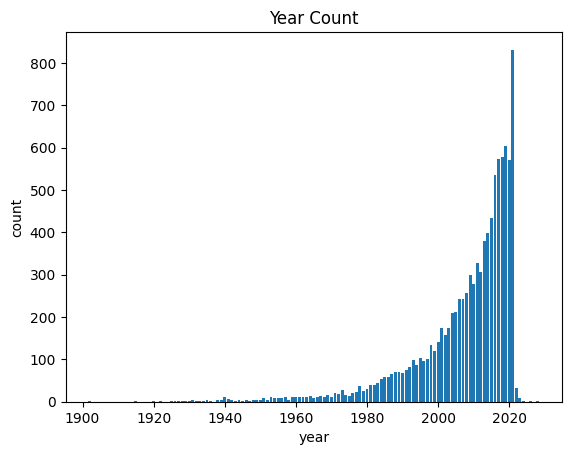

In [49]:
plt.bar(year_counts.index,year_counts.values)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Year Count')
plt.show()

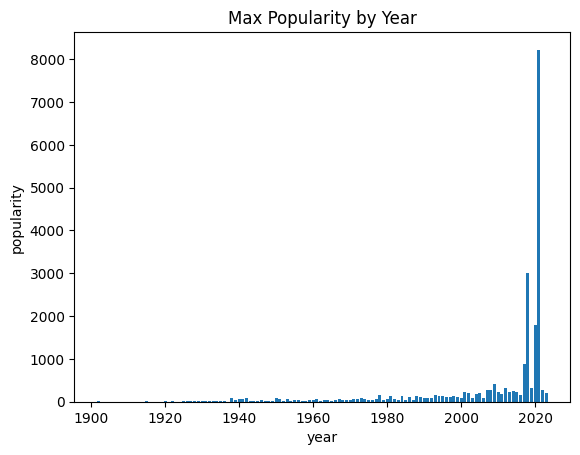

In [50]:
plt.bar(max_popularity_by_year.index,max_popularity_by_year.values)
plt.xlabel('year')
plt.ylabel('popularity')
plt.title('Max Popularity by Year')
plt.show()

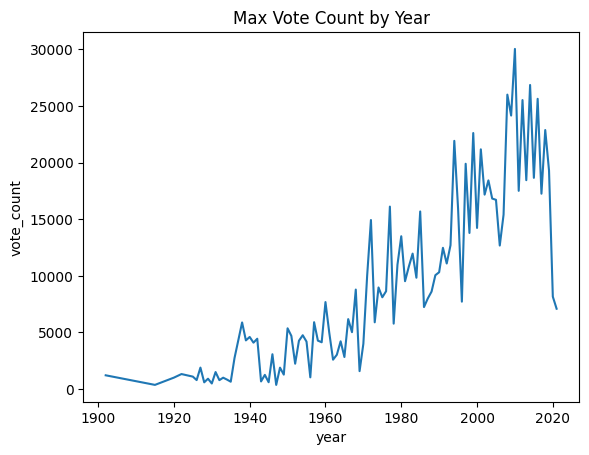

In [51]:
plt.plot(max_vote_count_by_year.index,max_vote_count_by_year.values)
plt.xlabel('year')
plt.ylabel('vote_count')
plt.title('Max Vote Count by Year')
plt.show()

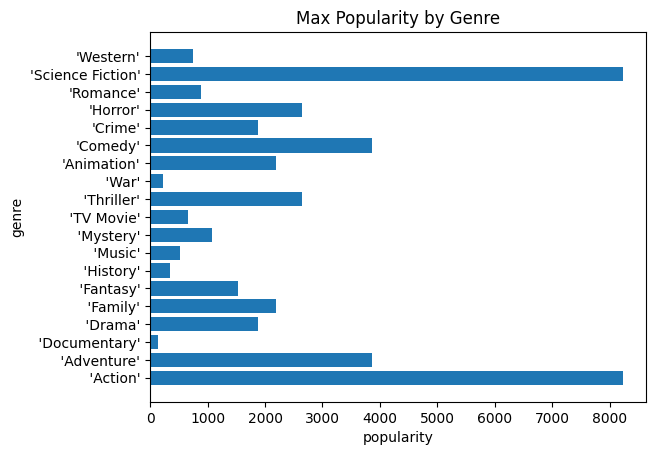

In [52]:
plt.barh(max_popularity_by_genre['genre'],max_popularity_by_genre['popularity'])
plt.xlabel('popularity')
plt.ylabel('genre')
plt.title('Max Popularity by Genre')
plt.show()

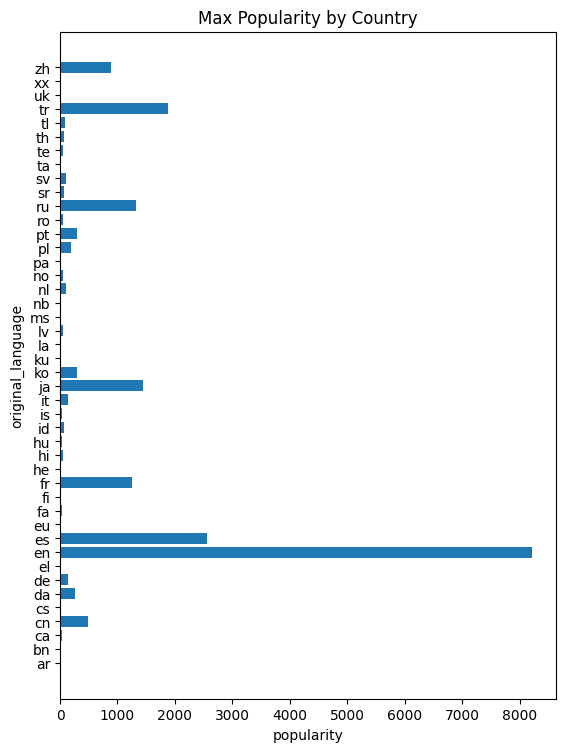

In [53]:
plt.barh(max_popularity_by_country.index,max_popularity_by_country.values)
plt.xlabel('popularity')
plt.ylabel('original_language')
plt.title('Max Popularity by Country')
plt.subplots_adjust(top = 1.5)
plt.show()